In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('husl')

In [7]:
from sklearn.linear_model import LinearRegression

In [99]:
wine = pd.read_csv('wine.csv')

# Introducción 

In [100]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
 6   FrancePop    25 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.5 KB


In [101]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2002.000000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.359801,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1990.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1996.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,2002.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,2008.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,2014.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


Price es nuestra variable dependiente y el resto son variables independientes que usaremos para predecir el precio.

creamos un modelo de regresión lineal de una variable para predecir Price basado en AGST

# Regresión de una variable

In [102]:
winelm = LinearRegression()

In [103]:
AGST = wine['AGST'].values.reshape((-1,1))

average growing season temperatures (AGSTs) 

In [104]:
Prices = wine['Price'].values.reshape((-1,1))

La matriz de entrada x necesita ser 2D, más precisamente, tener cualquier número de filas y una columna. Por lo tanto, tenemos que transformar la matriz. remodelar((-1,1)) : El '-1' como primer argumento permite a numpy determinar por ti el número desconocido de filas en la matriz resultante. 

El '1' especifica una columna. La salida es una matriz de columnas de una dimensión.

In [105]:
winelm.fit(AGST, Price)

LinearRegression()

In [106]:
winelm.intercept_

-3.4177613134854603

In [107]:
winelm.coef_

array([0.63509431])

In [108]:
wineY = winelm.intercept_ + winelm.coef_*AGST

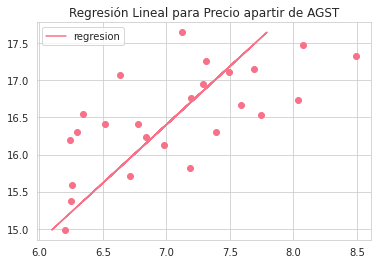

In [109]:
ax, fig = plt.subplots()
plt.plot(wineY, AGST, label='regresion')
plt.scatter(Prices,AGST)
plt.title('Regresión Lineal para Precio apartir de AGST')
plt.legend()
plt.show()

In [110]:
winelm.score(AGST,Price)

0.4350231677999199

In [160]:
wine_test = pd.read_csv('wine_test.csv')

In [161]:
wine_test.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,2015,6.9541,717,16.1667,122,4,54835.832
1,2016,6.4979,578,16.0000,74,3,55110.236
2,2017,6.3450,620,15.7800,78,5,52431.647


In [163]:
wineTest = wine_test['AGST'].values.reshape(-1,1)
winePredict = winelm.predict(winepredict)

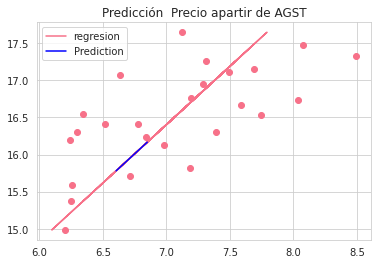

In [169]:
ax, fig = plt.subplots()
plt.plot(wineY, AGST, label='regresion')
plt.plot(winePredict, wineTest, color='b', label='Prediction')
plt.scatter(Prices,AGST)
plt.title('Predicción  Precio apartir de AGST')
plt.legend()
plt.show()

Produce el valor R-cuadrado del modelo. R-cuadrado es la medida de cuán cerca están los datos dados de la línea de regresión calculada.

# Modelo Multivariable 

In [246]:
X = wine[['AGST','HarvestRain']].values.reshape(-1,2)

In [112]:
winelm2 = LinearRegression()

In [113]:
winelm2.fit(X,Price)

LinearRegression()

In [31]:
winelm2.score(X,Price)

0.7073707662049415

In [114]:
winelm2.intercept_

-2.202653600949949

In [115]:
winelm2.coef_

array([ 0.60261691, -0.00457006])

Varias variables, un solo plano. no es un hiperplano.  Loss Function . - Gradient Descent. 

 # sklearn para hacer split

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = wine['Price'].values.reshape((-1,1))
X = wine['AGST'].values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=42)


In [248]:
X_train.size + X_test.size

25

In [249]:
X.size

25

In [250]:
lreg = LinearRegression()

0.5021950839050424


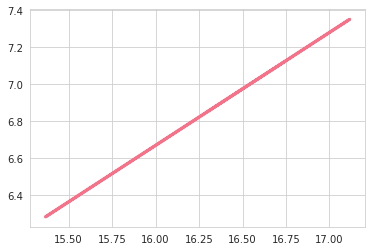

In [251]:
# Fit the model to the data
lreg.fit(X_train,y_train)


y_pred = lreg.predict(X_test)

# Print R^2 
print(lreg.score(X_test,y_test))


plt.plot(X_test, y_pred, linewidth=3)
plt.show()


# Ridge Regression

0.5023081406689737


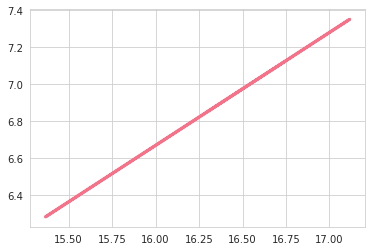

In [252]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3, random_state=42)
lridge = Ridge(alpha=0.01, normalize=True)
lridge.fit(X_train, y_train)
lridge_pred = lridge.predict(X_test)
print(lridge.score(X_test, y_test))

plt.plot(X_test, y_pred, linewidth=3)
plt.show()


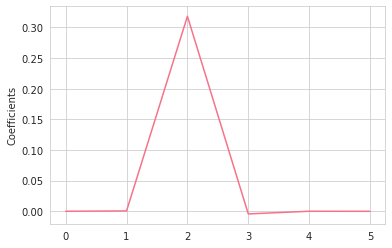

In [96]:
from sklearn.linear_model import Lasso
names = wine.drop('Price', axis=1).columns 
lasso = Lasso(alpha=0.1) # qué tan importante es la penalización. suponiendo que tengas un alfa muy grande(overfitting) 
# cuando tienes un gran número de variables 

X = wine.drop('Price', axis=1).values.reshape(-1,6)
y = wine['Price'].values.reshape((-1,1))

lasso_coef =lasso.fit(X,y).coef_ 

plt.plot(range(len(names)), lasso_coef)
plt.ylabel('Coefficients')
plt.show()

Regularización y penalización.  lasso(colinealidad, correlacionada)  y ridge. el hecho de ser un valor absoluto le permite que el espacio de busqueda siempre llegue a ser un valor 0



In [78]:
lasso_coef

array([0.4067392])

In [122]:
vida = pd.read_csv('vidaP.csv')

In [123]:
vida.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


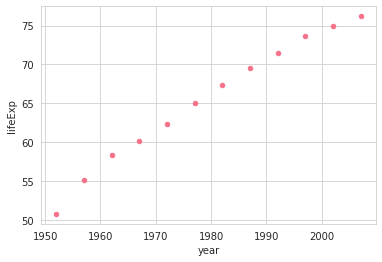

In [128]:

vidaMex = vida[vida['country'] == 'Mexico']
vidaMex.plot(kind='scatter',
             x='year',y='lifeExp')

In [133]:
#x = np.asarray(vidaMex[['year']])
#y = np.asarray(vidaMex[['lifeExp']])

x = vidaMex['year'].values.reshape((-1,1))
y = vidaMex['lifeExp'].values.reshape((-1,1))

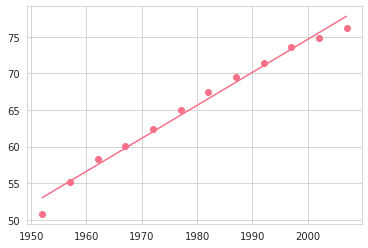

In [140]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred)

In [136]:
model.predict([[2020]])

array([[83.67574942]])

In [143]:
model.score(x,y)

0.9852044388728112

In [137]:
from sklearn.neighbors import KNeighborsRegressor

array([[74.92233333]])

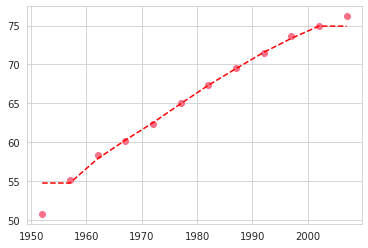

In [138]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x,y)
y_pred = knn.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,'--r')
knn.predict([[2020]])


In [144]:
knn.score(x,y)

0.975707148187642

In [148]:
import sklearn.metrics as m 
print('MAE',m.mean_absolute_error(y,y_pred))
print('MAX_Error', m.max_error(y,y_pred))
print(m.mean_squared_error(y,y_pred))
print(m.median_absolute_error(y,y_pred))



MAE 0.0
MAX_Error 2.2163717948717405
0.9101653580031058
0.000245759480634401
0.6807622377622238
0.9852044388728112
0.9852044388728112


In [176]:
# Regresión Polinomial

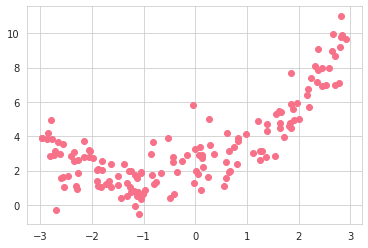

In [234]:
np.random.seed(42)
m = 150
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)
plt.scatter(x, y)


In [235]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures

In [236]:
d = 100
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])

model.fit(X,y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=100, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

(-3.0, 3.0, 0.0, 10.0)

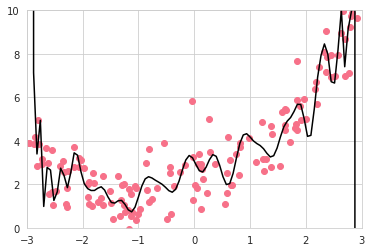

In [237]:
xnew=np.linspace(-3, 3, 100).reshape(-1, 1)
ynew = model.predict(xnew)

ax, fig = plt.subplots()
plt.plot(xnew,ynew,color='black')
plt.scatter(x, y)

plt.axis([-3, 3, 0, 10])


In [238]:
#Imprimimos los datos de entrenamiento
model.score(x,y)

0.8784995315666283

Train:  0.9048771908568322
Test:  -1297454632256701.5


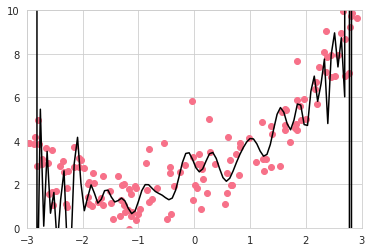

In [239]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3)

d = 100
model2 = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])
model2.fit(X_train, y_train)

xnew=np.linspace(-3, 3, 100).reshape(-1, 1)
ynew = model2.predict(xnew)

ax, fig = plt.subplots()
plt.plot(xnew,ynew,color='black')
plt.scatter(x, y)

plt.axis([-3, 3, 0, 10])


print('Train: ', model2.score(X_train,y_train))
print('Test: ', model2.score(X_test, y_test))

Train:  0.8339019587531646
Test:  0.6126841021639085


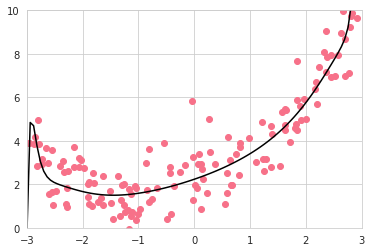

In [241]:
d = 100
ridgeModel = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Ridge(alpha=2))])

ridgeModel.fit(X_train, y_train)

# Crear nuevos puntos para dibujar puntos
xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = ridgeModel.predict(xnew)


# Dibujar datos
ax, fig = plt.subplots()
plt.plot(xnew,ynew,color='black')
plt.scatter(x, y)
plt.axis([-3, 3, 0, 10])

print('Train: ', ridgeModel.score(X_train, y_train))
print('Test: ', ridgeModel.score(X_test, y_test))

Train:  0.8311119484365116
Test:  0.8133365321889966


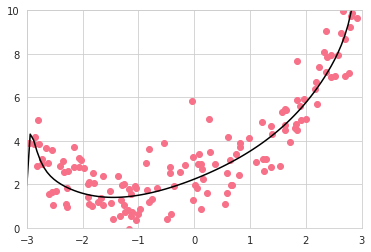

In [242]:
from sklearn.linear_model import Lasso

d = 100
lassoModel = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Lasso(alpha=0.01))])

lassoModel.fit(X_train, y_train)

# Crear nuevos puntos para dibujar puntos
#xnew=np.linspace(-3, 3, 100).reshape(100, 1)
ynew = lassoModel.predict(xnew)

# Dibujar datos
ax, fig = plt.subplots()
plt.plot(xnew,ynew,color='black')
plt.scatter(x, y)
plt.axis([-3, 3, 0, 10])

print('Train: ', lassoModel.score(X_train, y_train))
print('Test: ', lassoModel.score(X_test, y_test))
